In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Defino la raiz del sistema de archivos
raiz="/content/drive/MyDrive/Colab Notebooks"

# Importo el archivo
solicitantes = pd.read_excel(raiz+'/0. SolicitantesCrédito (1).xlsx',sheet_name=0)
solicitantes.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Estrato,Nivel de estudios,Tipo de contrato,Ingresos,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,1,38,NR,Casado,1,0,3,Bachiller,Ninguno,5424576,...,48,82691.506204,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.041659,582.478943,0.063702
1,2,51,NR,Separado,6,1,4,Técnico,Ninguno,1144064,...,36,22781.212598,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1.0,0.234951,479.839966,0.465636
2,3,37,Mujer,Casado,2,0,3,Tecnólogo,Indefinido,2069853,...,36,46294.596244,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0.0,0.170330,417.653107,0.290071
3,4,29,NR,Separado,1,0,2,Tecnólogo,Ninguno,1893080,...,24,69564.950015,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.201659,316.791107,0.278389
4,5,42,Mujer,Casado,3,4,2,Especializacion,Ninguno,3000367,...,24,112478.307883,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.140929,441.809570,0.203359


In [ ]:
# Elimino las filas donde "PreApr" está vacío
XD= solicitantes.dropna(subset=["PreApr"])

In [ ]:
# Esojo las variables que necesito
XD=XD[['Edad','Hijos','Perscargo','Estrato','Ingresos','Egresos',
       'Monto (EAD)','Plazo','Cuota (COP)']]
XD

,Edad,Hijos,Perscargo,Estrato,Ingresos,Egresos,Monto (EAD),Plazo,Cuota (COP)
0,38,1,0,3,5424576,7585302,2.815030e+06,48,82691.506204
1,51,6,1,4,1144064,1640079,6.301439e+05,36,22781.212598
2,37,2,0,3,2069853,2831440,1.280540e+06,36,46294.596244
3,29,1,0,2,1893080,2482276,1.393414e+06,24,69564.950015
4,42,3,4,2,3000367,3630221,2.252986e+06,24,112478.307883
...,...,...,...,...,...,...,...,...,...
8371,48,0,0,3,4831392,3392105,3.366188e+06,36,121695.762156
8373,31,2,0,5,5891088,4292158,3.918572e+06,48,115108.056436
8374,38,0,0,3,3092079,3028098,2.677266e+06,36,96789.562091
8375,43,1,2,2,2542007,3513112,1.375112e+06,36,49713.608249


In [ ]:
## Escogemos la variable dependiente
yd=solicitantes['PreApr'].dropna()

In [ ]:
## Importo las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB

In [ ]:
# Conveirto los datasets a arrays
XDArray= np.array(XD, dtype=float)
ydArray= np.array(yd, dtype=float)

In [ ]:
## Entreno el Modelo
modelNB = GaussianNB()
modelNB.fit(XDArray, ydArray)

GaussianNB()

In [ ]:
## Solicito al modelo que me prediga los yd
ydPred=modelNB.predict(XDArray)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
CM= confusion_matrix(ydArray, ydPred)
CM

array([[2539,  420],
       [1041, 1842]])

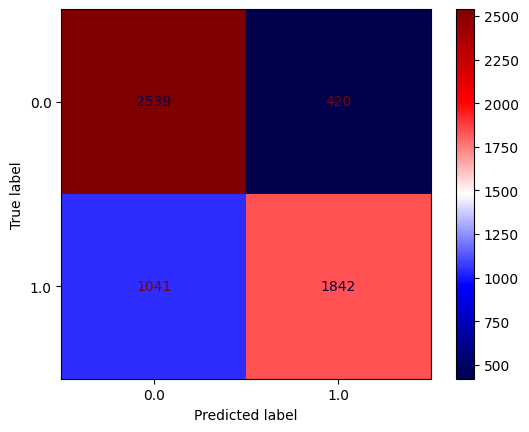

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM,
                              display_labels=modelNB.classes_)
disp.plot(cmap='seismic')
plt.show()

In [ ]:
### Exactitud (Accuracy)
print(f'La exactitud del modelo es del {(CM[1][1]+CM[0][0])/CM.sum():.4%}')

La exactitud del modelo es del 74.9914%


In [ ]:
## Tasa de Error
print(f'La tasa de error del modelo es del {(CM[1][0]+CM[0][1])/CM.sum():.4%}')

La tasa de error del modelo es del 25.0086%


In [ ]:
## Sensibilidad / Exhaustividad (Recall)
print(f'La sensibilidad del modelo es del {CM[1][1]/(CM[1][1]+CM[1][0]):.4%}')

La sensibilidad del modelo es del 63.8918%


In [ ]:
## Especificidad
print(f'La especificidad del modelo es del {CM[0][0]/(CM[0][0]+CM[0][1]):.4%}')

La especificidad del modelo es del 85.8060%


In [ ]:
## Precisión
print(f'La precisión del modelo es del {CM[1][1]/(CM[1][1]+CM[0][1]):.4%}')

La precisión del modelo es del 81.4324%


In [ ]:
## Filtro los solicitantes que no tienen aún una calificación
XDGener = solicitantes[solicitantes['PreApr'].isna()]
XDGener

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Estrato,Nivel de estudios,Tipo de contrato,Ingresos,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
6,7,38,NR,Soltero,3,0,3,Profesional,Indefinido,1534711,...,60,2.009414e+04,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
7,8,47,Mujer,Casado,0,0,2,Profesional,Ninguno,136750,...,48,3.563229e+03,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
11,12,46,Mujer,Casado,0,1,4,Primaria,Indefinido,7097220,...,3,1.090054e+06,Buenas Referencias,Con Codeudor(es),Prop.sin Hipoteca,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
13,14,37,Mujer,Soltero,4,2,2,Técnico,Ninguno,1791987,...,48,6.856249e+04,Buena Experiencia CFB,Sin Codeudor,Prop.sin Hipoteca,Mora mayor a 60 Dìas,NaN,NaN,NaN,NaN
16,17,22,NR,Unión Libre,1,0,2,Bachiller,Fijo,2892545,...,36,6.824255e+04,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,8358,24,NR,Casado,1,0,4,Técnico,Fijo,2433168,...,48,1.026380e+05,Buenas Referencias,Con Codeudor(es),Vehìculo sin Prenda,Sin experiencia,NaN,NaN,NaN,NaN
8358,8359,66,Hombre,Unión Libre,1,0,1,Técnico,Indefinido,83684,...,24,1.908509e+03,Buenas Referencias,Libranza Establecida,Sin Patrimonio,Mora mayor a 60 Dìas,NaN,NaN,NaN,NaN
8367,8368,32,NR,Unión Libre,0,1,4,Bachiller,Fijo,1133063,...,36,3.665316e+04,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
8372,8373,35,Hombre,Separado,2,1,3,Primaria,Indefinido,3073152,...,18,1.375805e+05,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN


In [ ]:
## Acoto el dataset solo a las columnas que necesito para generalizar el modelo
XDGener=XDGener[['Edad','Hijos','Perscargo','Estrato','Ingresos','Egresos',
       'Monto (EAD)','Plazo','Cuota (COP)']]
XDGener

,Edad,Hijos,Perscargo,Estrato,Ingresos,Egresos,Monto (EAD),Plazo,Cuota (COP)
6,38,3,0,3,1534711,1658694,7.913126e+05,60,2.009414e+04
7,47,0,0,2,136750,171155,1.213014e+05,48,3.563229e+03
11,46,0,1,4,7097220,9525257,3.174456e+06,3,1.090054e+06
13,37,4,2,2,1791987,1391431,2.334042e+06,48,6.856249e+04
16,22,1,0,2,2892545,3576891,1.887636e+06,36,6.824255e+04
...,...,...,...,...,...,...,...,...,...
8357,24,1,0,4,2433168,1518301,3.494059e+06,48,1.026380e+05
8358,66,1,0,1,83684,120852,3.822821e+04,24,1.908509e+03
8367,32,0,1,4,1133063,766199,1.013852e+06,36,3.665316e+04
8372,35,2,1,3,3073152,3812690,2.156239e+06,18,1.375805e+05


In [ ]:
## Convierto el dataframe a un array
XDGenerArray= np.array(XDGener, dtype=float)
XDGenerArray

array([[3.80000000e+01, 3.00000000e+00, 0.00000000e+00, ...,
        7.91312558e+05, 6.00000000e+01, 2.00941380e+04],
       [4.70000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        1.21301418e+05, 4.80000000e+01, 3.56322911e+03],
       [4.60000000e+01, 0.00000000e+00, 1.00000000e+00, ...,
        3.17445619e+06, 3.00000000e+00, 1.09005416e+06],
       ...,
       [3.20000000e+01, 0.00000000e+00, 1.00000000e+00, ...,
        1.01385156e+06, 3.60000000e+01, 3.66531625e+04],
       [3.50000000e+01, 2.00000000e+00, 1.00000000e+00, ...,
        2.15623904e+06, 1.80000000e+01, 1.37580518e+05],
       [2.40000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        1.90927674e+06, 3.60000000e+01, 6.90249281e+04]])

In [ ]:
## Solicito al modelo que pronostique la calificación (PreApr) a los solicitantes
## que aún no lo tienen
ydGener=modelNB.predict(XDGenerArray)
ydGener

array([0., 0., 1., ..., 0., 0., 0.])

In [ ]:
ydGenerSerie = pd.Series(ydGener, index=solicitantes[solicitantes['PreApr'].isna()].index)
ydGenerSerie

solicitantes['PreApr'].fillna(ydGenerSerie, inplace=True)
solicitantes

<ipython-input-25-670c27d72502>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  solicitantes['PreApr'].fillna(ydGenerSerie, inplace=True)


,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Estrato,Nivel de estudios,Tipo de contrato,Ingresos,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,1,38,NR,Casado,1,0,3,Bachiller,Ninguno,5424576,...,48,82691.506204,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.041659,582.478943,0.063702
1,2,51,NR,Separado,6,1,4,Técnico,Ninguno,1144064,...,36,22781.212598,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1.0,0.234951,479.839966,0.465636
2,3,37,Mujer,Casado,2,0,3,Tecnólogo,Indefinido,2069853,...,36,46294.596244,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0.0,0.170330,417.653107,0.290071
3,4,29,NR,Separado,1,0,2,Tecnólogo,Ninguno,1893080,...,24,69564.950015,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.201659,316.791107,0.278389
4,5,42,Mujer,Casado,3,4,2,Especializacion,Ninguno,3000367,...,24,112478.307883,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.140929,441.809570,0.203359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,8374,31,Hombre,Soltero,2,0,5,Bachiller,Indefinido,5891088,...,48,115108.056436,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.035120,659.471375,0.066962
8374,8375,38,Hombre,Separado,0,0,3,Bachiller,Labor Contratada,3092079,...,36,96789.562091,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1.0,0.101976,465.011536,0.165936
8375,8376,43,Mujer,Casado,1,2,2,Tecnólogo,Ninguno,2542007,...,36,49713.608249,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.156707,423.237305,0.247763
8376,8377,37,Mujer,Casado,1,2,3,Tecnólogo,Indefinido,5677067,...,36,163602.818587,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.037719,592.670837,0.051356


In [ ]:
solicitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8378 non-null   int64  
 1   Edad                     8378 non-null   int64  
 2   Sexo                     8378 non-null   object 
 3   Estado civil             8378 non-null   object 
 4   Hijos                    8378 non-null   int64  
 5   Perscargo                8378 non-null   int64  
 6   Estrato                  8378 non-null   int64  
 7   Nivel de estudios        8378 non-null   object 
 8   Tipo de contrato         8378 non-null   object 
 9   Ingresos                 8378 non-null   int64  
 10  Egresos                  8378 non-null   int64  
 11  Tipo de actividad        8378 non-null   object 
 12  Tipo de vivienda         8378 non-null   object 
 13  Total Activos            8378 non-null   float64
 14  Total pasivos           